# TF-IDF + Feed Forward Neural Network

ในส่วนนี้เราจะใช้ข้อมูลชุดเดิมและใช้ TF-IDF ในการแทนแต่ละประโยคหลังจากนั้นก็เทรน ด้วย Feed Forward Neural Network

โค้ดดัดแปลงมาจาก https://colab.research.google.com/drive/1SR_j7FUYcJ21CCsIT8fkRjGOteevQEPa#scrollTo=4Wf_YSr78IMO

In [ ]:
import pandas as pd
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [ ]:
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


train_data


,text,sentiment,clean_text,clean2_text,clean3_text,clean4_text,wordseged_text,wordseged_space_text
0,ประสิทเจียวก็คนดี,1,ประสิทเจียวก็คนดี,ประสิทเจียวก็คนดี,ประสิทเจียวก็คนดี,ประสิทเจียวก็คนดี,"['ประ', 'สิ', 'ท', 'เจียว', 'ก็', 'คนดี']",ประ สิ ท เจียว ก็ คนดี
1,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,2,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,"['สุดยอด', 'คุณ', 'รังสิ', 'มัน', 'โลม', 'พูด'...",สุดยอด คุณ รังสิ มัน โลม พูด ได้ ถูกใจ มาก ค่ะ
2,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมือ...,1,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมือ...,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมือ...,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมือ...,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมือ...,"['อ้าว', 'วันนี้', 'เอา', 'แฝด', 'คนละ', 'ฝา',...",อ้าว วันนี้ เอา แฝด คนละ ฝา มา เจอกัน วิเคราะห...
3,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชน...,2,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชน...,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชน...,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชน...,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชน...,"['ขอบคุณ', 'สุภาพบุรุษ', 'ที่', 'ชื่อ', 'พิธา'...",ขอบคุณ สุภาพบุรุษ ที่ ชื่อ พิธา ที่ ยัง ห่วงใย...
4,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือน...,0,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือน...,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือน...,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือน...,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือน...,"['นับวัน', 'ยิ่ง', 'แย่', 'ลง', 'ๆ', 'ทุก', 'ท...",นับวัน ยิ่ง แย่ ลง ๆ ทุก ทีเดียว อีกหน่อย จะ เ...
...,...,...,...,...,...,...,...,...
31267,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,2,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,"['คุณ', 'คือ', 'คนดี', 'ของ', 'สังคม', 'ยัว', ...",คุณ คือ คนดี ของ สังคม ยัว มีโอกาส สู้ ต่อไป คะ
31268,555สุดยอดเลย,2,555สุดยอดเลย,555สุดยอดเลย,555สุดยอดเลย,555สุดยอดเลย,"['555', 'สุดยอด', 'เลย']",555 สุดยอด เลย
31269,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาช...,0,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาช...,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาช...,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาช...,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาช...,"['บุก', 'แม้', 'งก', 'ระ', 'ทืบ', 'แม้', 'ง', ...",บุก แม้ งก ระ ทืบ แม้ ง พวก ที่ ทำให้ ประเทศ ไ...
31270,สุดยอดครับ,2,สุดยอดครับ,สุดยอดครับ,สุดยอดครับ,สุดยอดครับ,"['สุดยอด', 'ครับ']",สุดยอด ครับ


In [ ]:
test_data

,text,sentiment,clean_text,clean2_text,clean3_text,clean4_text,wordseged_text,wordseged_space_text
0,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,1,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,"['สมัย', 'หน้า', 'พรรค', 'คุณ', 'มี', 'เก้าอี้...",สมัย หน้า พรรค คุณ มี เก้าอี้ เพิ่ม แน่นอน ครับ
1,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,2,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,"['สม', 'แล้ว', 'ค่ะ', 'ที่', 'ชื่อ', 'พรรคเป็น...",สม แล้ว ค่ะ ที่ ชื่อ พรรคเป็นธรรม
2,สู้เงินไม่ได้,1,สู้เงินไม่ได้,สู้เงินไม่ได้,สู้เงินไม่ได้,สู้เงินไม่ได้,"['สู้', 'เงิน', 'ไม่', 'ได้']",สู้ เงิน ไม่ ได้
3,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเรา...,1,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเรา...,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเรา...,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเรา...,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเรา...,"['สัจจะ', 'กิน', 'ไม่', 'ได้', 'แต่', 'มัน', '...",สัจจะ กิน ไม่ ได้ แต่ มัน ทำให้ คุณ สูงส่ง พูด...
4,ชอบคุนนะชาดา,2,ชอบคุนนะชาดา,ชอบคุนนะชาดา,ชอบคุนนะชาดา,ชอบคุนนะชาดา,"['ชอบ', 'คุ', 'น', 'นะ', 'ชา', 'ดา']",ชอบ คุ น นะ ชา ดา
...,...,...,...,...,...,...,...,...
7813,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื...,0,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื...,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื...,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื...,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื...,"['เขา', 'จะ', 'หลอก', 'ให้', 'พวกคุณ', 'เสนอ',...",เขา จะ หลอก ให้ พวกคุณ เสนอ จน ครบ ยังไง สว เข...
7814,ใช่พลาดมากและผิดหวังกับประธานสภามากเลยค่ะสุดท้...,0,ใช่พลาดมากและผิดหวังกับประธานสภามากเลยค่ะสุดท้...,ใช่พลาดมากและผิดหวังกับประธานสภามากเลยค่ะสุดท้...,ใช่พลาดมากและผิดหวังกับประธานสภามากเลยค่ะสุดท้...,ใช่พลาดมากและผิดหวังกับประธานสภามากเลยค่ะสุดท้...,"['ใช่', 'พลาด', 'มาก', 'และ', 'ผิดหวัง', 'กับ'...",ใช่ พลาด มาก และ ผิดหวัง กับ ประธาน สภา มาก เล...
7815,เป็นกำลังใจให้คุณพิธาค่ะ,2,เป็นกำลังใจให้คุณพิธาค่ะ,เป็นกำลังใจให้คุณพิธาค่ะ,เป็นกำลังใจให้คุณพิธาค่ะ,เป็นกำลังใจให้คุณพิธาค่ะ,"['เป็น', 'กำลังใจ', 'ให้', 'คุณ', 'พิธา', 'ค่ะ']",เป็น กำลังใจ ให้ คุณ พิธา ค่ะ
7816,ท่านพูดถูกต้องลูกหลานไทยจะต้องรู้จักประวัติศาส...,2,ท่านพูดถูกต้องลูกหลานไทยจะต้องรู้จักประวัติศาส...,ท่านพูดถูกต้องลูกหลานไทยจะต้องรู้จักประวัติศาส...,ท่านพูดถูกต้องลูกหลานไทยจะต้องรู้จักประวัติศาส...,ท่านพูดถูกต้องลูกหลานไทยจะต้องรู้จักประวัติศาส...,"['ท่าน', 'พูด', 'ถูกต้อง', 'ลูกหลาน', 'ไทย', '...",ท่าน พูด ถูกต้อง ลูกหลาน ไทย จะ ต้อง รู้จัก ปร...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from pythainlp.util import normalize
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
import torch
import numpy as np

# สร้าง vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, dtype=np.float32)

# สร้าง DataFrame เพื่อเก็บค่า TF-IDF แต่ละคำ
tfidf_matrix = tfidf_vectorizer.fit_transform(["ทด สอบ ดู นะ ครับ"]).toarray()
features = tfidf_vectorizer.get_feature_names_out()

import pandas as pd

df = pd.DataFrame(tfidf_matrix, columns=features)
df


,คร,ทด,นะ,สอบ
0,0.5,0.5,0.5,0.5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from pythainlp.util import normalize
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
import torch
import numpy as np

# แบ่งข้อมูลเป็น train 80% validation 20%
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42, stratify=train_data['sentiment'])

# เตรียมข้อมูลสำหรับการเทรนและทดสอบ
train_sentences = train_data['wordseged_space_text'].values
train_labels = train_data['sentiment'].values

val_sentences = val_data['wordseged_space_text'].values
val_labels = val_data['sentiment'].values

test_sentences = test_data['wordseged_space_text'].values
test_labels = test_data['sentiment'].values

# ทำการเข้ารหัส labels
encoder = LabelEncoder()
train_encoded_labels = encoder.fit_transform(train_labels)
val_encoded_labels = encoder.transform(val_labels)
test_encoded_labels = encoder.transform(test_labels)

# สร้าง vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, dtype=np.float32)

# ใช้ชุดเทรนในการสร้าง vectorizer
tfidfX_train = tfidf_vectorizer.fit_transform(train_sentences)
tfidfX_train = torch.tensor(tfidfX_train.toarray())

# ใช้ vectorizer ในการแปลงชุดตรวจสอบและทดสอบ
tfidfX_val = tfidf_vectorizer.transform(val_sentences)
tfidfX_val = torch.tensor(tfidfX_val.toarray())

tfidfX_test = tfidf_vectorizer.transform(test_sentences)
tfidfX_test = torch.tensor(tfidfX_test.toarray())

print("TF-IDF train shape:", tfidfX_train.shape)
print("TF-IDF test shape:", tfidfX_test.shape)
print("TF-IDF val shape:", tfidfX_val.shape)


TF-IDF train shape: torch.Size([23454, 1000])
TF-IDF test shape: torch.Size([7818, 1000])
TF-IDF val shape: torch.Size([7818, 1000])


In [ ]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

25017
6255
7818


In [ ]:
train_data

,text,sentiment,clean_text,clean2_text,clean3_text,clean4_text,wordseged_text,wordseged_space_text
2846,ไล่สว237ออก,1,ไล่สว237ออก,ไล่สว237ออก,ไล่สว237ออก,ไล่สว237ออก,"['ไล่', 'สว', '237', 'ออก']",ไล่ สว 237 ออก
29142,ก้าวไกลเพื่อไทยอย่ายอมแพ้,1,ก้าวไกลเพื่อไทยอย่ายอมแพ้,ก้าวไกลเพื่อไทยอย่ายอมแพ้,ก้าวไกลเพื่อไทยอย่ายอมแพ้,ก้าวไกลเพื่อไทยอย่ายอมแพ้,"['ก้าวไกล', 'เพื่อ', 'ไทย', 'อย่า', 'ยอมแพ้']",ก้าวไกล เพื่อ ไทย อย่า ยอมแพ้
8603,เขาด่าสวแต่โยงว่าทำลายชาติ,0,เขาด่าสวแต่โยงว่าทำลายชาติ,เขาด่าสวแต่โยงว่าทำลายชาติ,เขาด่าสวแต่โยงว่าทำลายชาติ,เขาด่าสวแต่โยงว่าทำลายชาติ,"['เขา', 'ด่า', 'สว', 'แต่', 'โยง', 'ว่า', 'ทำล...",เขา ด่า สว แต่ โยง ว่า ทำลาย ชาติ
28657,ดรสุดยอดเลยคะจัดไปคะพวกไร้สมอง,2,ดรสุดยอดเลยคะจัดไปคะพวกไร้สมอง,ดรสุดยอดเลยคะจัดไปคะพวกไร้สมอง,ดรสุดยอดเลยคะจัดไปคะพวกไร้สมอง,ดรสุดยอดเลยคะจัดไปคะพวกไร้สมอง,"['ดร', 'สุดยอด', 'เลย', 'คะ', 'จัด', 'ไป', 'คะ...",ดร สุดยอด เลย คะ จัด ไป คะ พวก ไร้ สมอง
3965,ถ้าหวังจะหยุดก้าวไกลได้ต่อให้ยุบพรรคเขาก็มีคนใ...,1,ถ้าหวังจะหยุดก้าวไกลได้ต่อให้ยุบพรรคเขาก็มีคนใ...,ถ้าหวังจะหยุดก้าวไกลได้ต่อให้ยุบพรรคเขาก็มีคนใ...,ถ้าหวังจะหยุดก้าวไกลได้ต่อให้ยุบพรรคเขาก็มีคนใ...,ถ้าหวังจะหยุดก้าวไกลได้ต่อให้ยุบพรรคเขาก็มีคนใ...,"['ถ้า', 'หวัง', 'จะ', 'หยุด', 'ก้าวไกล', 'ได้'...",ถ้า หวัง จะ หยุด ก้าวไกล ได้ ต่อให้ ยุบ พรรค เ...
...,...,...,...,...,...,...,...,...
30983,เจาได้สู้มาถึงขั้นตอนนี้คิดว่าทุกเหตุการณ์เขาร...,2,เจาได้สู้มาถึงขั้นตอนนี้คิดว่าทุกเหตุการณ์เขาร...,เจาได้สู้มาถึงขั้นตอนนี้คิดว่าทุกเหตุการณ์เขาร...,เจาได้สู้มาถึงขั้นตอนนี้คิดว่าทุกเหตุการณ์เขาร...,เจาได้สู้มาถึงขั้นตอนนี้คิดว่าทุกเหตุการณ์เขาร...,"['เจา', 'ได้', 'สู้', 'มา', 'ถึงขั้น', 'ตอนนี้...",เจา ได้ สู้ มา ถึงขั้น ตอนนี้ คิด ว่า ทุก เหตุ...
30584,เดีํยวพวกนี้ก็ส่งเรื่องให้ศาลรัฐธรรมนูญเหมือนเดิม,1,เดีํยวพวกนี้ก็ส่งเรื่องให้ศาลรัฐธรรมนูญเหมือนเดิม,เดีํยวพวกนี้ก็ส่งเรื่องให้ศาลรัฐธรรมนูญเหมือนเดิม,เดีํยวพวกนี้ก็ส่งเรื่องให้ศาลรัฐธรรมนูญเหมือนเดิม,เดีํยวพวกนี้ก็ส่งเรื่องให้ศาลรัฐธรรมนูญเหมือนเดิม,"['เด', 'ีํยว', 'พวก', 'นี้', 'ก็', 'ส่ง', 'เรื...",เด ีํยว พวก นี้ ก็ ส่ง เรื่อง ให้ ศาลรัฐธรรมนู...
617,ร้องได้ดีมากๆเลยค่ะมันตรงกับใจมากที่สุดเลยขอขอ...,2,ร้องได้ดีมากๆเลยค่ะมันตรงกับใจมากที่สุดเลยขอขอ...,ร้องได้ดีมากๆเลยค่ะมันตรงกับใจมากที่สุดเลยขอขอ...,ร้องได้ดีมากๆเลยค่ะมันตรงกับใจมากที่สุดเลยขอขอ...,ร้องได้ดีมากๆเลยค่ะมันตรงกับใจมากที่สุดเลยขอขอ...,"['ร้อง', 'ได้', 'ดีมาก', 'ๆ', 'เลย', 'ค่ะ', 'ม...",ร้อง ได้ ดีมาก ๆ เลย ค่ะ มัน ตรง กับ ใจ มาก ที...
28255,คุณพิธาคุณคือนายกของใจคนไทยทั้งปวง,1,คุณพิธาคุณคือนายกของใจคนไทยทั้งปวง,คุณพิธาคุณคือนายกของใจคนไทยทั้งปวง,คุณพิธาคุณคือนายกของใจคนไทยทั้งปวง,คุณพิธาคุณคือนายกของใจคนไทยทั้งปวง,"['คุณ', 'พิธา', 'คุณ', 'คือ', 'นายก', 'ของ', '...",คุณ พิธา คุณ คือ นายก ของ ใจ คนไทย ทั้งปวง


In [ ]:
# ตรวจสอบค่าที่มี train_encoded_labels เป็น -1
indices_with_minus_one = [index for index, label in enumerate(train_encoded_labels) if label == 3]

# พิมพ์ค่าที่มี train_encoded_labels เป็น -1
for index in indices_with_minus_one:
    print(f"Index: {index}, Label: {train_encoded_labels[index]}")


In [ ]:
import torch
import numpy as np

# Assuming train_labels, test_labels, etc. are NumPy arrays
# Convert the labels to the appropriate data type before creating PyTorch tensors

Y_train = torch.squeeze(torch.tensor(train_encoded_labels).long())
Y_val = torch.squeeze(torch.tensor(val_encoded_labels).long())  # Corrected from test_labels to val_labels
Y_test = torch.squeeze(torch.tensor(test_encoded_labels).long())

print("Y train shape:", Y_train.shape)
print("Y validation shape:", Y_val.shape)  # Corrected from "Y shape" to "Y validation shape"
print("Y test shape:", Y_test.shape)


Y train shape: torch.Size([23454])
Y validation shape: torch.Size([7818])
Y test shape: torch.Size([7818])


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cpu


In [ ]:
#สร้าง FFNN ขึ้นมา
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, output_dim):
        super(FFNN, self).__init__()

        # Linear function 1
        self.layer_1 = nn.Linear(input_dim, hidden_dim_1)
        # self.dropout = nn.Dropout(0.3)
        # self.batch1 = nn.BatchNorm1d(hidden_dim)

        # Non-linearity 1
        self.relu_1 = nn.ReLU()

        # Linear function 2
        self.layer_2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        # Non-linearity 2
        self.relu_2 = nn.ReLU()

        # Linear function 3
        self.layer_3 = nn.Linear(hidden_dim_2, output_dim)

    def forward(self, x):
        out = self.layer_1(x)
        out = self.relu_1(out)

        out = self.layer_2(out)
        out = self.relu_2(out)

        out = self.layer_3(out)

        return torch.sigmoid(out)

In [ ]:
# กำหนดพารามิเตอร์
input_dim = tfidfX_train.shape[1]
hidden_dim_1 = 512 #จำนวนโหนด
hidden_dim_2 = 512
output_dim = 3 #จำนวน output dim ใช้ 1 ได้ คือเราอยากจะทำนายค่าออกมาค่าเดียว 0 = negative และ 1 คือ เป็น positive #แก้ label
num_epochs = 200

# สร้าง model จากคลาส
first_model = FFNN(input_dim, hidden_dim_1, hidden_dim_2, output_dim)

# Define loss function.
criterion = nn.CrossEntropyLoss()


# Define as optimizer Adam.
optimizer = optim.Adam(first_model.parameters(),lr=0.1e-3,weight_decay=1e-3)

# Transfer all the computation to GPU (cuda device).
first_model.to(device)
criterion = criterion.to(device)

In [ ]:
from torchsummary import summary

# กำหนด device ให้เป็น cuda หากใช้ GPU, ไม่งั้นให้ใช้ cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ย้ายโมเดลไปที่ GPU หากใช้ cuda
first_model.to(device)

# ใช้ torchsummary ในการแสดงสรุปของโมเดล
summary(first_model, input_size=(input_dim,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         512,512
              ReLU-2                  [-1, 512]               0
            Linear-3                  [-1, 512]         262,656
              ReLU-4                  [-1, 512]               0
            Linear-5                    [-1, 3]           1,539
Total params: 776,707
Trainable params: 776,707
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.96
Estimated Total Size (MB): 2.98
----------------------------------------------------------------


In [ ]:
from tqdm import tqdm

# This is a function that calculate the accuracy manually
def calculate_accuracy(y_true, y_pred):
  y_pred = torch.round(y_pred)
  #print(y_pred.argmax(-1))
  correct = (y_true == y_pred.argmax(-1)).float()
  acc = correct.sum() / len(correct)
  return acc

batch_size = 32 #ปรับได้

print(tfidfX_train.shape)
print(Y_train.shape)
# Split train dataset to mini batches
X_train_mini_batches = torch.split(tfidfX_train,batch_size)
Y_train_mini_batches = torch.split(Y_train,batch_size)



train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Start training
for epoch in range(num_epochs):
  print('epoch',epoch)
  epoch_loss = 0
  epoch_accuracy = 0
  validation_loss=0
  val_accuracy=0

  for X_train_mini_batch,Y_train_mini_batch in tqdm(zip(X_train_mini_batches,Y_train_mini_batches)):

    X_train_mini_batch = X_train_mini_batch.to(device)
    Y_train_mini_batch = Y_train_mini_batch.to(device)

    if Y_train_mini_batch.shape[0]==0:
        continue



    # Forward pass to get output
    train_prediction = first_model.forward(X_train_mini_batch.float())
    train_prediction = torch.squeeze(train_prediction)

    #print(Y_train_mini_batch.shape,train_prediction.shape)


    # Calculate Loss
    train_loss = criterion(train_prediction,Y_train_mini_batch)



    # Clearing up accumulated gradients
    optimizer.zero_grad()

    # Getting gradients
    train_loss.backward()

    # Updating parameters
    optimizer.step()

    # Add each mini batch's loss
    epoch_loss += train_loss.item()

    # Add each mini batch's accuracy
    epoch_accuracy += calculate_accuracy(Y_train_mini_batch,train_prediction)

  # For some epochs print loss and accucary of train and validation set.
  if epoch % 1 == 0:

    tfidfX_val = tfidfX_val.to(device)
    Y_val = Y_val.to(device)

    # Forward pass to get output
    val_prediction = first_model.forward(tfidfX_val.float())
    val_prediction = torch.squeeze(val_prediction)

    # Calculate Loss
    print(val_prediction.shape,Y_val.shape)
    val_loss = criterion(val_prediction,Y_val)

    # Add each mini batch's loss
    validation_loss = val_loss.item()

    # Add each mini batch's accuracy
    val_accuracy = calculate_accuracy(Y_val,val_prediction)

    epoch_loss /= len(X_train_mini_batches)
    epoch_accuracy /= len(X_train_mini_batches)
    val_losses.append(validation_loss)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    val_accuracies.append(val_accuracy)
    print("Epoch:",epoch, "\n"
           "Train_loss:",round(epoch_loss,4), "Train Accuracy:",round(epoch_accuracy.item(),4), "\n"
           "Validation_loss:  ",round(validation_loss,4), "Validation Accuracy:  ",round(val_accuracy.item(),4), "\n")

# Save PyTorch model state dict to a file
torch.save(first_model.state_dict(), 'FFNN_model.pth')

torch.Size([23454, 1000])
torch.Size([23454])
epoch 0


733it [00:06, 115.86it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 0 
Train_loss: 0.995 Train Accuracy: 0.5356 
Validation_loss:   0.8935 Validation Accuracy:   0.6238 

epoch 1


733it [00:08, 89.25it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 1 
Train_loss: 0.8748 Train Accuracy: 0.6537 
Validation_loss:   0.8697 Validation Accuracy:   0.6618 

epoch 2


733it [00:50, 14.59it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 2 
Train_loss: 0.8579 Train Accuracy: 0.6711 
Validation_loss:   0.8592 Validation Accuracy:   0.6646 

epoch 3


733it [00:57, 12.76it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 3 
Train_loss: 0.849 Train Accuracy: 0.6822 
Validation_loss:   0.8534 Validation Accuracy:   0.6715 

epoch 4


733it [00:55, 13.11it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 4 
Train_loss: 0.8437 Train Accuracy: 0.6911 
Validation_loss:   0.8498 Validation Accuracy:   0.6766 

epoch 5


733it [00:59, 12.24it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 5 
Train_loss: 0.8402 Train Accuracy: 0.6983 
Validation_loss:   0.8473 Validation Accuracy:   0.6825 

epoch 6


733it [01:07, 10.89it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 6 
Train_loss: 0.8375 Train Accuracy: 0.7032 
Validation_loss:   0.8453 Validation Accuracy:   0.6866 

epoch 7


733it [01:04, 11.39it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 7 
Train_loss: 0.8354 Train Accuracy: 0.7069 
Validation_loss:   0.8435 Validation Accuracy:   0.6905 

epoch 8


733it [00:53, 13.81it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 8 
Train_loss: 0.8334 Train Accuracy: 0.7123 
Validation_loss:   0.8416 Validation Accuracy:   0.6972 

epoch 9


733it [00:41, 17.85it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 9 
Train_loss: 0.8314 Train Accuracy: 0.7168 
Validation_loss:   0.8396 Validation Accuracy:   0.7017 

epoch 10


733it [00:38, 18.90it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 10 
Train_loss: 0.8293 Train Accuracy: 0.7223 
Validation_loss:   0.8372 Validation Accuracy:   0.7087 

epoch 11


733it [00:42, 17.26it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 11 
Train_loss: 0.8266 Train Accuracy: 0.7281 
Validation_loss:   0.8341 Validation Accuracy:   0.7174 

epoch 12


733it [00:44, 16.47it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 12 
Train_loss: 0.8224 Train Accuracy: 0.7378 
Validation_loss:   0.8275 Validation Accuracy:   0.7279 

epoch 13


733it [00:42, 17.29it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 13 
Train_loss: 0.8048 Train Accuracy: 0.7412 
Validation_loss:   0.8024 Validation Accuracy:   0.7355 

epoch 14


733it [00:44, 16.63it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 14 
Train_loss: 0.787 Train Accuracy: 0.7438 
Validation_loss:   0.7944 Validation Accuracy:   0.7419 

epoch 15


733it [00:45, 16.12it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 15 
Train_loss: 0.7803 Train Accuracy: 0.7477 
Validation_loss:   0.7909 Validation Accuracy:   0.741 

epoch 16


733it [00:45, 15.97it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 16 
Train_loss: 0.7767 Train Accuracy: 0.7507 
Validation_loss:   0.7891 Validation Accuracy:   0.7414 

epoch 17


733it [00:44, 16.48it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 17 
Train_loss: 0.7745 Train Accuracy: 0.7522 
Validation_loss:   0.788 Validation Accuracy:   0.743 

epoch 18


733it [00:43, 16.74it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 18 
Train_loss: 0.7729 Train Accuracy: 0.7536 
Validation_loss:   0.7872 Validation Accuracy:   0.7429 

epoch 19


733it [00:43, 16.82it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 19 
Train_loss: 0.7717 Train Accuracy: 0.7549 
Validation_loss:   0.7867 Validation Accuracy:   0.7433 

epoch 20


733it [00:44, 16.52it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 20 
Train_loss: 0.7708 Train Accuracy: 0.7554 
Validation_loss:   0.7863 Validation Accuracy:   0.7428 

epoch 21


733it [00:42, 17.16it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 21 
Train_loss: 0.7701 Train Accuracy: 0.7562 
Validation_loss:   0.7859 Validation Accuracy:   0.743 

epoch 22


733it [00:42, 17.36it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 22 
Train_loss: 0.7696 Train Accuracy: 0.7562 
Validation_loss:   0.7857 Validation Accuracy:   0.7425 

epoch 23


733it [00:45, 16.16it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 23 
Train_loss: 0.7691 Train Accuracy: 0.7569 
Validation_loss:   0.7855 Validation Accuracy:   0.7419 

epoch 24


733it [00:47, 15.52it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 24 
Train_loss: 0.7687 Train Accuracy: 0.7575 
Validation_loss:   0.7853 Validation Accuracy:   0.7424 

epoch 25


733it [00:47, 15.34it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 25 
Train_loss: 0.7683 Train Accuracy: 0.7577 
Validation_loss:   0.7851 Validation Accuracy:   0.7434 

epoch 26


733it [00:48, 15.25it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 26 
Train_loss: 0.768 Train Accuracy: 0.7588 
Validation_loss:   0.7849 Validation Accuracy:   0.7428 

epoch 27


733it [00:46, 15.65it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 27 
Train_loss: 0.7678 Train Accuracy: 0.7594 
Validation_loss:   0.7848 Validation Accuracy:   0.7425 

epoch 28


733it [00:45, 16.25it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 28 
Train_loss: 0.7675 Train Accuracy: 0.7603 
Validation_loss:   0.7846 Validation Accuracy:   0.7424 

epoch 29


733it [00:43, 16.78it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 29 
Train_loss: 0.7673 Train Accuracy: 0.7608 
Validation_loss:   0.7845 Validation Accuracy:   0.743 

epoch 30


733it [00:43, 16.90it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 30 
Train_loss: 0.767 Train Accuracy: 0.7609 
Validation_loss:   0.7843 Validation Accuracy:   0.7438 

epoch 31


733it [00:42, 17.12it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 31 
Train_loss: 0.7668 Train Accuracy: 0.7613 
Validation_loss:   0.7842 Validation Accuracy:   0.7441 

epoch 32


733it [00:42, 17.38it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 32 
Train_loss: 0.7667 Train Accuracy: 0.7615 
Validation_loss:   0.7841 Validation Accuracy:   0.7442 

epoch 33


733it [00:40, 18.02it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 33 
Train_loss: 0.7665 Train Accuracy: 0.7616 
Validation_loss:   0.784 Validation Accuracy:   0.7443 

epoch 34


733it [00:39, 18.35it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 34 
Train_loss: 0.7663 Train Accuracy: 0.7623 
Validation_loss:   0.7839 Validation Accuracy:   0.7444 

epoch 35


733it [00:40, 18.11it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 35 
Train_loss: 0.7662 Train Accuracy: 0.7623 
Validation_loss:   0.7839 Validation Accuracy:   0.7443 

epoch 36


733it [00:42, 17.16it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 36 
Train_loss: 0.7661 Train Accuracy: 0.7625 
Validation_loss:   0.7838 Validation Accuracy:   0.7442 

epoch 37


733it [00:44, 16.60it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 37 
Train_loss: 0.766 Train Accuracy: 0.7625 
Validation_loss:   0.7837 Validation Accuracy:   0.7441 

epoch 38


733it [00:44, 16.57it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 38 
Train_loss: 0.7659 Train Accuracy: 0.7629 
Validation_loss:   0.7837 Validation Accuracy:   0.7442 

epoch 39


733it [00:44, 16.45it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 39 
Train_loss: 0.7658 Train Accuracy: 0.7629 
Validation_loss:   0.7836 Validation Accuracy:   0.7442 

epoch 40


733it [00:44, 16.56it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 40 
Train_loss: 0.7657 Train Accuracy: 0.7631 
Validation_loss:   0.7836 Validation Accuracy:   0.7442 

epoch 41


733it [00:42, 17.10it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 41 
Train_loss: 0.7656 Train Accuracy: 0.7632 
Validation_loss:   0.7836 Validation Accuracy:   0.7442 

epoch 42


733it [00:41, 17.46it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 42 
Train_loss: 0.7655 Train Accuracy: 0.7633 
Validation_loss:   0.7835 Validation Accuracy:   0.7443 

epoch 43


733it [00:43, 16.72it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 43 
Train_loss: 0.7655 Train Accuracy: 0.7633 
Validation_loss:   0.7835 Validation Accuracy:   0.7451 

epoch 44


733it [00:43, 16.89it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 44 
Train_loss: 0.7654 Train Accuracy: 0.7635 
Validation_loss:   0.7834 Validation Accuracy:   0.7449 

epoch 45


733it [00:45, 16.01it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 45 
Train_loss: 0.7653 Train Accuracy: 0.7636 
Validation_loss:   0.7834 Validation Accuracy:   0.7451 

epoch 46


733it [00:44, 16.61it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 46 
Train_loss: 0.7653 Train Accuracy: 0.7638 
Validation_loss:   0.7834 Validation Accuracy:   0.7456 

epoch 47


733it [00:43, 16.72it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 47 
Train_loss: 0.7652 Train Accuracy: 0.7638 
Validation_loss:   0.7834 Validation Accuracy:   0.7456 

epoch 48


733it [00:43, 16.81it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 48 
Train_loss: 0.7652 Train Accuracy: 0.764 
Validation_loss:   0.7833 Validation Accuracy:   0.7456 

epoch 49


733it [00:43, 16.97it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 49 
Train_loss: 0.7651 Train Accuracy: 0.7641 
Validation_loss:   0.7833 Validation Accuracy:   0.7456 

epoch 50


733it [00:43, 16.69it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 50 
Train_loss: 0.7651 Train Accuracy: 0.7643 
Validation_loss:   0.7833 Validation Accuracy:   0.7455 

epoch 51


733it [00:42, 17.14it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 51 
Train_loss: 0.765 Train Accuracy: 0.7644 
Validation_loss:   0.7833 Validation Accuracy:   0.7458 

epoch 52


733it [00:44, 16.31it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 52 
Train_loss: 0.765 Train Accuracy: 0.7644 
Validation_loss:   0.7833 Validation Accuracy:   0.7462 

epoch 53


733it [00:45, 15.97it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 53 
Train_loss: 0.7649 Train Accuracy: 0.7647 
Validation_loss:   0.7832 Validation Accuracy:   0.7462 

epoch 54


733it [00:45, 16.05it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 54 
Train_loss: 0.7649 Train Accuracy: 0.7649 
Validation_loss:   0.7832 Validation Accuracy:   0.7461 

epoch 55


733it [00:43, 16.77it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 55 
Train_loss: 0.7648 Train Accuracy: 0.7649 
Validation_loss:   0.7832 Validation Accuracy:   0.746 

epoch 56


733it [00:45, 15.94it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 56 
Train_loss: 0.7648 Train Accuracy: 0.765 
Validation_loss:   0.7832 Validation Accuracy:   0.7461 

epoch 57


733it [00:47, 15.34it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 57 
Train_loss: 0.7647 Train Accuracy: 0.7651 
Validation_loss:   0.7832 Validation Accuracy:   0.746 

epoch 58


733it [00:46, 15.81it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 58 
Train_loss: 0.7647 Train Accuracy: 0.7652 
Validation_loss:   0.7831 Validation Accuracy:   0.7461 

epoch 59


733it [00:47, 15.57it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 59 
Train_loss: 0.7647 Train Accuracy: 0.7654 
Validation_loss:   0.7831 Validation Accuracy:   0.7458 

epoch 60


733it [00:45, 16.13it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 60 
Train_loss: 0.7646 Train Accuracy: 0.7656 
Validation_loss:   0.7831 Validation Accuracy:   0.7458 

epoch 61


733it [00:44, 16.34it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 61 
Train_loss: 0.7646 Train Accuracy: 0.7657 
Validation_loss:   0.7831 Validation Accuracy:   0.7461 

epoch 62


733it [00:44, 16.54it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 62 
Train_loss: 0.7645 Train Accuracy: 0.7658 
Validation_loss:   0.7831 Validation Accuracy:   0.7461 

epoch 63


733it [00:45, 16.01it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 63 
Train_loss: 0.7645 Train Accuracy: 0.7659 
Validation_loss:   0.783 Validation Accuracy:   0.7465 

epoch 64


733it [00:46, 15.74it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 64 
Train_loss: 0.7644 Train Accuracy: 0.7658 
Validation_loss:   0.783 Validation Accuracy:   0.7464 

epoch 65


733it [00:47, 15.56it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 65 
Train_loss: 0.7644 Train Accuracy: 0.7659 
Validation_loss:   0.783 Validation Accuracy:   0.7464 

epoch 66


733it [00:47, 15.57it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 66 
Train_loss: 0.7644 Train Accuracy: 0.7659 
Validation_loss:   0.783 Validation Accuracy:   0.7461 

epoch 67


733it [00:48, 15.22it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 67 
Train_loss: 0.7643 Train Accuracy: 0.7659 
Validation_loss:   0.783 Validation Accuracy:   0.7462 

epoch 68


733it [00:48, 15.09it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 68 
Train_loss: 0.7643 Train Accuracy: 0.766 
Validation_loss:   0.783 Validation Accuracy:   0.7461 

epoch 69


733it [00:48, 15.13it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 69 
Train_loss: 0.7642 Train Accuracy: 0.766 
Validation_loss:   0.7829 Validation Accuracy:   0.7462 

epoch 70


733it [00:48, 15.18it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 70 
Train_loss: 0.7642 Train Accuracy: 0.7661 
Validation_loss:   0.7829 Validation Accuracy:   0.7465 

epoch 71


733it [00:46, 15.64it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 71 
Train_loss: 0.7642 Train Accuracy: 0.7661 
Validation_loss:   0.7829 Validation Accuracy:   0.7465 

epoch 72


733it [00:47, 15.41it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 72 
Train_loss: 0.7641 Train Accuracy: 0.7664 
Validation_loss:   0.7829 Validation Accuracy:   0.7462 

epoch 73


733it [00:47, 15.48it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 73 
Train_loss: 0.7641 Train Accuracy: 0.7663 
Validation_loss:   0.7829 Validation Accuracy:   0.7464 

epoch 74


733it [00:49, 14.92it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 74 
Train_loss: 0.7641 Train Accuracy: 0.7663 
Validation_loss:   0.7829 Validation Accuracy:   0.7464 

epoch 75


733it [00:48, 15.15it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 75 
Train_loss: 0.764 Train Accuracy: 0.7662 
Validation_loss:   0.7829 Validation Accuracy:   0.7462 

epoch 76


733it [00:49, 14.74it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 76 
Train_loss: 0.764 Train Accuracy: 0.7664 
Validation_loss:   0.7829 Validation Accuracy:   0.7462 

epoch 77


733it [00:49, 14.74it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 77 
Train_loss: 0.764 Train Accuracy: 0.7664 
Validation_loss:   0.7828 Validation Accuracy:   0.7462 

epoch 78


733it [00:49, 14.92it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 78 
Train_loss: 0.7639 Train Accuracy: 0.7665 
Validation_loss:   0.7828 Validation Accuracy:   0.7464 

epoch 79


733it [00:48, 15.07it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 79 
Train_loss: 0.7639 Train Accuracy: 0.7664 
Validation_loss:   0.7828 Validation Accuracy:   0.7464 

epoch 80


733it [00:48, 15.24it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 80 
Train_loss: 0.7638 Train Accuracy: 0.7666 
Validation_loss:   0.7828 Validation Accuracy:   0.7467 

epoch 81


733it [00:49, 14.75it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 81 
Train_loss: 0.7638 Train Accuracy: 0.7665 
Validation_loss:   0.7828 Validation Accuracy:   0.7467 

epoch 82


733it [00:51, 14.16it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 82 
Train_loss: 0.7638 Train Accuracy: 0.7667 
Validation_loss:   0.7828 Validation Accuracy:   0.7467 

epoch 83


733it [00:50, 14.58it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 83 
Train_loss: 0.7637 Train Accuracy: 0.7669 
Validation_loss:   0.7828 Validation Accuracy:   0.7465 

epoch 84


733it [00:50, 14.48it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 84 
Train_loss: 0.7637 Train Accuracy: 0.7667 
Validation_loss:   0.7828 Validation Accuracy:   0.7467 

epoch 85


733it [00:51, 14.32it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 85 
Train_loss: 0.7637 Train Accuracy: 0.7669 
Validation_loss:   0.7828 Validation Accuracy:   0.7466 

epoch 86


733it [00:51, 14.19it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 86 
Train_loss: 0.7636 Train Accuracy: 0.767 
Validation_loss:   0.7828 Validation Accuracy:   0.7466 

epoch 87


733it [00:50, 14.60it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 87 
Train_loss: 0.7636 Train Accuracy: 0.767 
Validation_loss:   0.7827 Validation Accuracy:   0.7466 

epoch 88


733it [00:49, 14.69it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 88 
Train_loss: 0.7636 Train Accuracy: 0.767 
Validation_loss:   0.7827 Validation Accuracy:   0.7466 

epoch 89


733it [00:49, 14.77it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 89 
Train_loss: 0.7636 Train Accuracy: 0.767 
Validation_loss:   0.7827 Validation Accuracy:   0.7465 

epoch 90


733it [00:50, 14.38it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 90 
Train_loss: 0.7635 Train Accuracy: 0.767 
Validation_loss:   0.7827 Validation Accuracy:   0.7464 

epoch 91


733it [00:52, 14.08it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 91 
Train_loss: 0.7635 Train Accuracy: 0.767 
Validation_loss:   0.7827 Validation Accuracy:   0.7461 

epoch 92


733it [00:53, 13.82it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 92 
Train_loss: 0.7635 Train Accuracy: 0.7672 
Validation_loss:   0.7827 Validation Accuracy:   0.7461 

epoch 93


733it [00:53, 13.76it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 93 
Train_loss: 0.7634 Train Accuracy: 0.7671 
Validation_loss:   0.7827 Validation Accuracy:   0.7462 

epoch 94


733it [00:53, 13.68it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 94 
Train_loss: 0.7634 Train Accuracy: 0.7673 
Validation_loss:   0.7827 Validation Accuracy:   0.7461 

epoch 95


733it [00:52, 13.83it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 95 
Train_loss: 0.7634 Train Accuracy: 0.7672 
Validation_loss:   0.7826 Validation Accuracy:   0.7464 

epoch 96


733it [00:51, 14.19it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 96 
Train_loss: 0.7633 Train Accuracy: 0.7672 
Validation_loss:   0.7826 Validation Accuracy:   0.7462 

epoch 97


733it [00:51, 14.20it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 97 
Train_loss: 0.7633 Train Accuracy: 0.7673 
Validation_loss:   0.7826 Validation Accuracy:   0.7465 

epoch 98


733it [00:51, 14.27it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 98 
Train_loss: 0.7633 Train Accuracy: 0.7672 
Validation_loss:   0.7826 Validation Accuracy:   0.7461 

epoch 99


733it [00:51, 14.10it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 99 
Train_loss: 0.7632 Train Accuracy: 0.7672 
Validation_loss:   0.7826 Validation Accuracy:   0.7465 

epoch 100


733it [00:52, 13.95it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 100 
Train_loss: 0.7632 Train Accuracy: 0.7674 
Validation_loss:   0.7826 Validation Accuracy:   0.7464 

epoch 101


733it [00:52, 13.89it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 101 
Train_loss: 0.7632 Train Accuracy: 0.7672 
Validation_loss:   0.7826 Validation Accuracy:   0.7465 

epoch 102


733it [00:52, 13.87it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 102 
Train_loss: 0.7632 Train Accuracy: 0.7674 
Validation_loss:   0.7826 Validation Accuracy:   0.7462 

epoch 103


733it [00:53, 13.59it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 103 
Train_loss: 0.7631 Train Accuracy: 0.7675 
Validation_loss:   0.7826 Validation Accuracy:   0.7465 

epoch 104


733it [00:54, 13.55it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 104 
Train_loss: 0.7631 Train Accuracy: 0.7674 
Validation_loss:   0.7826 Validation Accuracy:   0.7464 

epoch 105


733it [00:53, 13.61it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 105 
Train_loss: 0.7631 Train Accuracy: 0.7674 
Validation_loss:   0.7825 Validation Accuracy:   0.7466 

epoch 106


733it [00:53, 13.78it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 106 
Train_loss: 0.7631 Train Accuracy: 0.7674 
Validation_loss:   0.7825 Validation Accuracy:   0.7466 

epoch 107


733it [00:52, 13.90it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 107 
Train_loss: 0.763 Train Accuracy: 0.7673 
Validation_loss:   0.7825 Validation Accuracy:   0.7466 

epoch 108


733it [00:53, 13.81it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 108 
Train_loss: 0.763 Train Accuracy: 0.7675 
Validation_loss:   0.7825 Validation Accuracy:   0.7466 

epoch 109


733it [00:53, 13.68it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 109 
Train_loss: 0.763 Train Accuracy: 0.7674 
Validation_loss:   0.7825 Validation Accuracy:   0.7467 

epoch 110


733it [00:52, 13.84it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 110 
Train_loss: 0.763 Train Accuracy: 0.7674 
Validation_loss:   0.7825 Validation Accuracy:   0.7467 

epoch 111


733it [00:52, 13.90it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 111 
Train_loss: 0.7629 Train Accuracy: 0.7674 
Validation_loss:   0.7825 Validation Accuracy:   0.7467 

epoch 112


733it [00:54, 13.57it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 112 
Train_loss: 0.7629 Train Accuracy: 0.7675 
Validation_loss:   0.7825 Validation Accuracy:   0.7467 

epoch 113


733it [00:53, 13.77it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 113 
Train_loss: 0.7629 Train Accuracy: 0.7674 
Validation_loss:   0.7825 Validation Accuracy:   0.7466 

epoch 114


733it [00:54, 13.44it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 114 
Train_loss: 0.7629 Train Accuracy: 0.7675 
Validation_loss:   0.7825 Validation Accuracy:   0.7466 

epoch 115


733it [00:57, 12.84it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 115 
Train_loss: 0.7628 Train Accuracy: 0.7675 
Validation_loss:   0.7825 Validation Accuracy:   0.7466 

epoch 116


733it [00:55, 13.11it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 116 
Train_loss: 0.7628 Train Accuracy: 0.7677 
Validation_loss:   0.7825 Validation Accuracy:   0.7466 

epoch 117


733it [00:57, 12.73it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 117 
Train_loss: 0.7628 Train Accuracy: 0.7674 
Validation_loss:   0.7825 Validation Accuracy:   0.7466 

epoch 118


733it [00:52, 14.06it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 118 
Train_loss: 0.7628 Train Accuracy: 0.7676 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 119


733it [00:52, 13.90it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 119 
Train_loss: 0.7628 Train Accuracy: 0.7677 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 120


733it [00:53, 13.67it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 120 
Train_loss: 0.7627 Train Accuracy: 0.7678 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 121


733it [00:55, 13.15it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 121 
Train_loss: 0.7627 Train Accuracy: 0.7678 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 122


733it [00:56, 13.04it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 122 
Train_loss: 0.7627 Train Accuracy: 0.7678 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 123


733it [00:55, 13.30it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 123 
Train_loss: 0.7627 Train Accuracy: 0.7678 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 124


733it [00:53, 13.66it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 124 
Train_loss: 0.7626 Train Accuracy: 0.768 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 125


733it [00:54, 13.38it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 125 
Train_loss: 0.7626 Train Accuracy: 0.7681 
Validation_loss:   0.7824 Validation Accuracy:   0.7466 

epoch 126


733it [00:53, 13.63it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 126 
Train_loss: 0.7626 Train Accuracy: 0.7681 
Validation_loss:   0.7824 Validation Accuracy:   0.7464 

epoch 127


733it [00:53, 13.61it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 127 
Train_loss: 0.7626 Train Accuracy: 0.7681 
Validation_loss:   0.7824 Validation Accuracy:   0.7466 

epoch 128


733it [00:54, 13.50it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 128 
Train_loss: 0.7626 Train Accuracy: 0.7682 
Validation_loss:   0.7824 Validation Accuracy:   0.7466 

epoch 129


733it [00:55, 13.29it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 129 
Train_loss: 0.7625 Train Accuracy: 0.7683 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 130


733it [00:54, 13.46it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 130 
Train_loss: 0.7625 Train Accuracy: 0.7684 
Validation_loss:   0.7824 Validation Accuracy:   0.7467 

epoch 131


733it [00:53, 13.64it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 131 
Train_loss: 0.7625 Train Accuracy: 0.7684 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 132


733it [00:55, 13.22it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 132 
Train_loss: 0.7625 Train Accuracy: 0.7684 
Validation_loss:   0.7824 Validation Accuracy:   0.7464 

epoch 133


733it [00:54, 13.48it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 133 
Train_loss: 0.7625 Train Accuracy: 0.7684 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 134


733it [00:54, 13.51it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 134 
Train_loss: 0.7625 Train Accuracy: 0.7683 
Validation_loss:   0.7824 Validation Accuracy:   0.7464 

epoch 135


733it [00:55, 13.25it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 135 
Train_loss: 0.7624 Train Accuracy: 0.7684 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 136


733it [00:56, 13.02it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 136 
Train_loss: 0.7624 Train Accuracy: 0.7684 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 137


733it [00:57, 12.82it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 137 
Train_loss: 0.7624 Train Accuracy: 0.7684 
Validation_loss:   0.7824 Validation Accuracy:   0.7466 

epoch 138


733it [00:57, 12.83it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 138 
Train_loss: 0.7624 Train Accuracy: 0.7684 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 139


733it [00:55, 13.16it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 139 
Train_loss: 0.7624 Train Accuracy: 0.7685 
Validation_loss:   0.7824 Validation Accuracy:   0.7465 

epoch 140


733it [00:54, 13.44it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 140 
Train_loss: 0.7624 Train Accuracy: 0.7684 
Validation_loss:   0.7823 Validation Accuracy:   0.7464 

epoch 141


733it [00:54, 13.53it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 141 
Train_loss: 0.7623 Train Accuracy: 0.7685 
Validation_loss:   0.7823 Validation Accuracy:   0.7464 

epoch 142


733it [00:56, 13.09it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 142 
Train_loss: 0.7623 Train Accuracy: 0.7684 
Validation_loss:   0.7823 Validation Accuracy:   0.7464 

epoch 143


733it [00:54, 13.53it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 143 
Train_loss: 0.7623 Train Accuracy: 0.7685 
Validation_loss:   0.7823 Validation Accuracy:   0.7466 

epoch 144


733it [00:54, 13.48it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 144 
Train_loss: 0.7623 Train Accuracy: 0.7685 
Validation_loss:   0.7823 Validation Accuracy:   0.7465 

epoch 145


733it [00:55, 13.19it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 145 
Train_loss: 0.7623 Train Accuracy: 0.7684 
Validation_loss:   0.7823 Validation Accuracy:   0.7465 

epoch 146


733it [00:56, 12.96it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 146 
Train_loss: 0.7623 Train Accuracy: 0.7685 
Validation_loss:   0.7823 Validation Accuracy:   0.7465 

epoch 147


733it [00:56, 13.04it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 147 
Train_loss: 0.7622 Train Accuracy: 0.7686 
Validation_loss:   0.7823 Validation Accuracy:   0.7462 

epoch 148


733it [00:55, 13.26it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 148 
Train_loss: 0.7622 Train Accuracy: 0.7687 
Validation_loss:   0.7823 Validation Accuracy:   0.7462 

epoch 149


733it [00:56, 13.04it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 149 
Train_loss: 0.7622 Train Accuracy: 0.7687 
Validation_loss:   0.7823 Validation Accuracy:   0.7461 

epoch 150


733it [00:56, 13.04it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 150 
Train_loss: 0.7622 Train Accuracy: 0.7687 
Validation_loss:   0.7823 Validation Accuracy:   0.7464 

epoch 151


733it [00:55, 13.14it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 151 
Train_loss: 0.7622 Train Accuracy: 0.7688 
Validation_loss:   0.7823 Validation Accuracy:   0.7464 

epoch 152


733it [00:56, 13.05it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 152 
Train_loss: 0.7621 Train Accuracy: 0.7687 
Validation_loss:   0.7823 Validation Accuracy:   0.7464 

epoch 153


733it [00:54, 13.34it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 153 
Train_loss: 0.7621 Train Accuracy: 0.7688 
Validation_loss:   0.7823 Validation Accuracy:   0.7465 

epoch 154


733it [00:54, 13.55it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 154 
Train_loss: 0.7621 Train Accuracy: 0.7687 
Validation_loss:   0.7823 Validation Accuracy:   0.7466 

epoch 155


733it [00:55, 13.28it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 155 
Train_loss: 0.7621 Train Accuracy: 0.7688 
Validation_loss:   0.7823 Validation Accuracy:   0.7466 

epoch 156


733it [00:57, 12.83it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 156 
Train_loss: 0.7621 Train Accuracy: 0.7687 
Validation_loss:   0.7823 Validation Accuracy:   0.7466 

epoch 157


733it [00:54, 13.39it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 157 
Train_loss: 0.7621 Train Accuracy: 0.7688 
Validation_loss:   0.7823 Validation Accuracy:   0.7465 

epoch 158


733it [00:54, 13.48it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 158 
Train_loss: 0.762 Train Accuracy: 0.7687 
Validation_loss:   0.7823 Validation Accuracy:   0.7466 

epoch 159


733it [00:54, 13.40it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 159 
Train_loss: 0.762 Train Accuracy: 0.7688 
Validation_loss:   0.7823 Validation Accuracy:   0.7465 

epoch 160


733it [00:55, 13.28it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 160 
Train_loss: 0.762 Train Accuracy: 0.7689 
Validation_loss:   0.7823 Validation Accuracy:   0.7464 

epoch 161


733it [00:55, 13.12it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 161 
Train_loss: 0.762 Train Accuracy: 0.7688 
Validation_loss:   0.7823 Validation Accuracy:   0.7466 

epoch 162


733it [00:54, 13.37it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 162 
Train_loss: 0.762 Train Accuracy: 0.7688 
Validation_loss:   0.7822 Validation Accuracy:   0.7464 

epoch 163


733it [00:53, 13.59it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 163 
Train_loss: 0.762 Train Accuracy: 0.7688 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 164


733it [00:55, 13.30it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 164 
Train_loss: 0.7619 Train Accuracy: 0.769 
Validation_loss:   0.7822 Validation Accuracy:   0.7465 

epoch 165


733it [00:54, 13.34it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 165 
Train_loss: 0.7619 Train Accuracy: 0.769 
Validation_loss:   0.7822 Validation Accuracy:   0.7466 

epoch 166


733it [00:54, 13.46it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 166 
Train_loss: 0.7619 Train Accuracy: 0.769 
Validation_loss:   0.7822 Validation Accuracy:   0.7466 

epoch 167


733it [00:55, 13.19it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 167 
Train_loss: 0.7619 Train Accuracy: 0.7691 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 168


733it [00:54, 13.44it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 168 
Train_loss: 0.7619 Train Accuracy: 0.769 
Validation_loss:   0.7822 Validation Accuracy:   0.7466 

epoch 169


733it [00:54, 13.40it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 169 
Train_loss: 0.7619 Train Accuracy: 0.7692 
Validation_loss:   0.7822 Validation Accuracy:   0.7466 

epoch 170


733it [00:55, 13.15it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 170 
Train_loss: 0.7619 Train Accuracy: 0.7691 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 171


733it [00:55, 13.31it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 171 
Train_loss: 0.7618 Train Accuracy: 0.7692 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 172


733it [00:54, 13.46it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 172 
Train_loss: 0.7618 Train Accuracy: 0.7692 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 173


733it [00:55, 13.15it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 173 
Train_loss: 0.7618 Train Accuracy: 0.7693 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 174


733it [00:55, 13.30it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 174 
Train_loss: 0.7618 Train Accuracy: 0.7692 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 175


733it [00:55, 13.26it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 175 
Train_loss: 0.7618 Train Accuracy: 0.7693 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 176


733it [00:54, 13.34it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 176 
Train_loss: 0.7618 Train Accuracy: 0.7694 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 177


733it [00:55, 13.22it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 177 
Train_loss: 0.7618 Train Accuracy: 0.7694 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 178


733it [00:54, 13.35it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 178 
Train_loss: 0.7618 Train Accuracy: 0.7695 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 179


733it [00:55, 13.10it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 179 
Train_loss: 0.7617 Train Accuracy: 0.7694 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 180


733it [00:55, 13.14it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 180 
Train_loss: 0.7617 Train Accuracy: 0.7695 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 181


733it [00:55, 13.31it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 181 
Train_loss: 0.7617 Train Accuracy: 0.7696 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 182


733it [00:55, 13.16it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 182 
Train_loss: 0.7617 Train Accuracy: 0.7695 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 183


733it [00:56, 12.94it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 183 
Train_loss: 0.7617 Train Accuracy: 0.7696 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 184


733it [00:55, 13.19it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 184 
Train_loss: 0.7617 Train Accuracy: 0.7695 
Validation_loss:   0.7822 Validation Accuracy:   0.7469 

epoch 185


733it [00:54, 13.37it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 185 
Train_loss: 0.7617 Train Accuracy: 0.7695 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 186


733it [00:55, 13.15it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 186 
Train_loss: 0.7616 Train Accuracy: 0.7695 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 187


733it [00:55, 13.31it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 187 
Train_loss: 0.7616 Train Accuracy: 0.7696 
Validation_loss:   0.7822 Validation Accuracy:   0.7467 

epoch 188


733it [00:55, 13.14it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 188 
Train_loss: 0.7616 Train Accuracy: 0.7697 
Validation_loss:   0.7821 Validation Accuracy:   0.7467 

epoch 189


733it [00:56, 12.88it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 189 
Train_loss: 0.7616 Train Accuracy: 0.7697 
Validation_loss:   0.7821 Validation Accuracy:   0.7469 

epoch 190


733it [00:56, 12.91it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 190 
Train_loss: 0.7616 Train Accuracy: 0.7697 
Validation_loss:   0.7821 Validation Accuracy:   0.7467 

epoch 191


733it [00:56, 12.95it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 191 
Train_loss: 0.7616 Train Accuracy: 0.7698 
Validation_loss:   0.7821 Validation Accuracy:   0.7467 

epoch 192


733it [00:57, 12.75it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 192 
Train_loss: 0.7616 Train Accuracy: 0.7697 
Validation_loss:   0.7821 Validation Accuracy:   0.7466 

epoch 193


733it [00:57, 12.84it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 193 
Train_loss: 0.7615 Train Accuracy: 0.7697 
Validation_loss:   0.7821 Validation Accuracy:   0.7466 

epoch 194


733it [00:56, 12.89it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 194 
Train_loss: 0.7615 Train Accuracy: 0.7696 
Validation_loss:   0.7821 Validation Accuracy:   0.7467 

epoch 195


733it [00:55, 13.14it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 195 
Train_loss: 0.7615 Train Accuracy: 0.7696 
Validation_loss:   0.7821 Validation Accuracy:   0.7467 

epoch 196


733it [00:56, 13.03it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 196 
Train_loss: 0.7615 Train Accuracy: 0.7696 
Validation_loss:   0.7821 Validation Accuracy:   0.747 

epoch 197


733it [00:57, 12.75it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 197 
Train_loss: 0.7615 Train Accuracy: 0.7696 
Validation_loss:   0.7821 Validation Accuracy:   0.747 

epoch 198


733it [00:57, 12.80it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 198 
Train_loss: 0.7615 Train Accuracy: 0.7697 
Validation_loss:   0.7821 Validation Accuracy:   0.747 

epoch 199


733it [00:57, 12.84it/s]


torch.Size([7818, 3]) torch.Size([7818])
Epoch: 199 
Train_loss: 0.7615 Train Accuracy: 0.7697 
Validation_loss:   0.7821 Validation Accuracy:   0.747 



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Save training and validation loss and accuracy
data = {
    'train_losses': train_losses,
    'train_accuracies': train_accuracies,
    'val_losses': val_losses,
    'val_accuracies': val_accuracies
}

np.save('training_history_FFNN.npy', data)


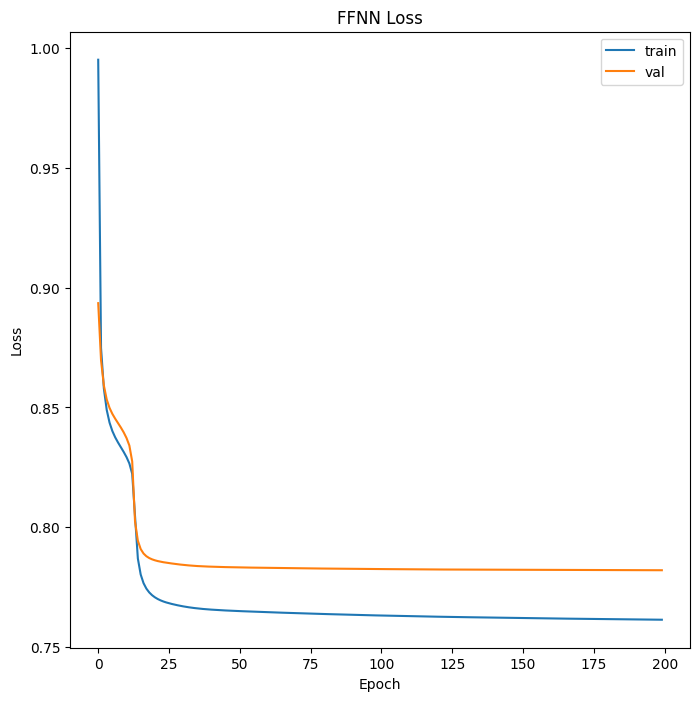

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8,8))
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('FFNN Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['train', 'val'], loc='upper right')
plt.show()


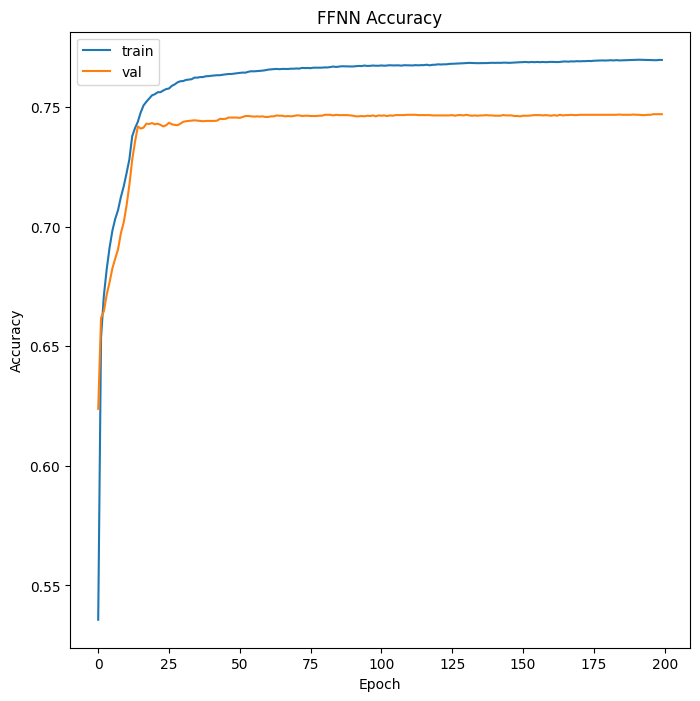

In [ ]:
figure(figsize=(8,8))
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.title('FFNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#ลองทำนายจากชุดเทส
tfidfX_test = tfidfX_test.to(device)
Y_test = Y_test.to(device)

# Forward pass to get output
first_model.eval()
test_prediction = first_model.forward(tfidfX_test.float())
#test_prediction = torch.squeeze(test_prediction)

#Calculate accuracy on test set
test_accuracy = calculate_accuracy(Y_test,test_prediction)

print("Test Accuracy:",round(test_accuracy.item(),4), "\n")

Test Accuracy: 0.7435 



In [ ]:
import torch

# สมมติว่า tensor เป็น tensor ที่ต้องการ gradient
tensor_with_grad = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# ใช้ .detach().numpy() แทน .numpy()
numpy_array = tensor_with_grad.detach().numpy()

# หรือจะใช้ .detach().cpu().numpy() หาก tensor อยู่บน GPU
numpy_array_on_cpu = tensor_with_grad.detach().cpu().numpy()


In [ ]:
import torch
import torch.nn as nn

class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, output_dim):
        super(FFNN, self).__init__()

        # Linear function 1
        self.layer_1 = nn.Linear(input_dim, hidden_dim_1)
        # Non-linearity 1
        self.relu_1 = nn.ReLU()

        # Linear function 2
        self.layer_2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        # Non-linearity 2
        self.relu_2 = nn.ReLU()

        # Linear function 3
        self.layer_3 = nn.Linear(hidden_dim_2, output_dim)

    def forward(self, x):
        out = self.layer_1(x)
        out = self.relu_1(out)

        out = self.layer_2(out)
        out = self.relu_2(out)

        out = self.layer_3(out)

        return torch.sigmoid(out)


# สร้างอ็อบเจ็กต์ของโมเดล
model = FFNN(input_dim = tfidfX_train.shape[1], hidden_dim_1 = 512, hidden_dim_2 = 512, output_dim = 3)

# โหลด state dictionary จากไฟล์
model_path = 'FFNN_model.pth'
state_dict = torch.load(model_path)

# โหลด state dictionary เข้าไปในโมเดล
model.load_state_dict(state_dict)

# ตั้งค่าโมเดลในโหมด eval (หรือ test) เพื่อป้องกันการปรับแต่งค่าของพารามิเตอร์
model.eval()

# ตอนนี้คุณสามารถใช้โมเดลที่โหลดมาในการทำนายได้


FFNN(
  (layer_1): Linear(in_features=1000, out_features=512, bias=True)
  (relu_1): ReLU()
  (layer_2): Linear(in_features=512, out_features=512, bias=True)
  (relu_2): ReLU()
  (layer_3): Linear(in_features=512, out_features=3, bias=True)
)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming val_prediction and Y_val are your predicted and true labels
# Convert the probabilities to class labels (0, 1, or 2) based on a threshold (e.g., 0.5)
threshold = 0.5
# Convert probabilities to class labels
predicted_labels = (val_prediction > threshold).float().argmax(-1).cpu().numpy()


# Print Confusion Matrix
conf_matrix = confusion_matrix(Y_val.cpu().numpy(), predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Print Classification Report
print("\nClassification Report:")
print(classification_report(Y_val.cpu().numpy(), predicted_labels, target_names=['Class 0', 'Class 1', 'Class 2']))


Confusion Matrix:
[[2240  265  101]
 [ 843 1577  186]
 [ 210  373 2023]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.68      0.86      0.76      2606
     Class 1       0.71      0.61      0.65      2606
     Class 2       0.88      0.78      0.82      2606

    accuracy                           0.75      7818
   macro avg       0.76      0.75      0.75      7818
weighted avg       0.76      0.75      0.75      7818



Confusion Matrix:
[[2240  265  101]
 [ 843 1577  186]
 [ 210  373 2023]]


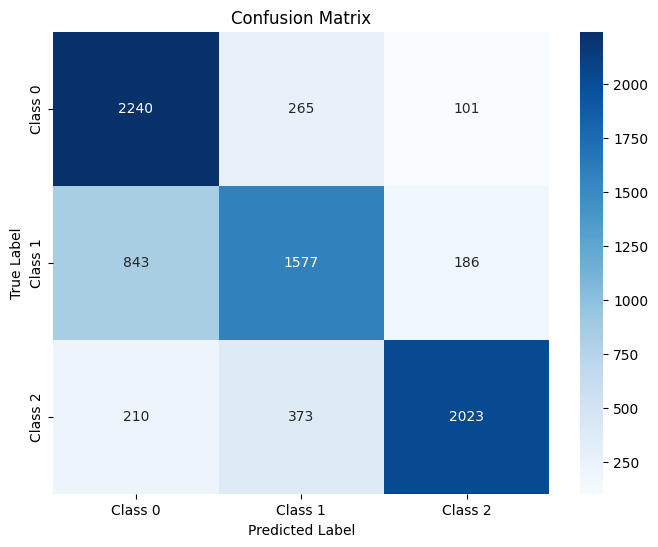

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print Confusion Matrix
conf_matrix = confusion_matrix(Y_val.cpu().numpy(), predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(len(Y_test))
print(len(predicted_labels))


7818
7818


In [ ]:
#Show the classification report
test_prediction = test_prediction.to(device)
print(test_prediction.shape)
test_prediction = test_prediction.cpu().argmax(-1)
Y_test = Y_test.cpu()
print(Y_test.shape)
print(classification_report(Y_test,test_prediction))

torch.Size([7818, 3])
torch.Size([7818])
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2606
           1       0.71      0.66      0.68      2606
           2       0.84      0.83      0.84      2606

    accuracy                           0.76      7818
   macro avg       0.76      0.76      0.76      7818
weighted avg       0.76      0.76      0.76      7818

